In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd

In [105]:
from scipy import signal, ndimage
from scipy.signal import hilbert, chirp
from statistics import mean
from scipy.signal import butter, lfilter, freqz


In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [4]:
import scienceplots
plt.style.use(['science','notebook','grid'])

In [5]:
name= 'inttime_har000_1200km'

In [80]:
df=pd.read_csv('../../datasets/'+name+'.csv')
t1=df['timestamps']
wp1=df['ls']
x=np.array(wp1)

dt= t1[1]-t1[0]
fs= 1/dt

Text(0, 0.5, 'signal')

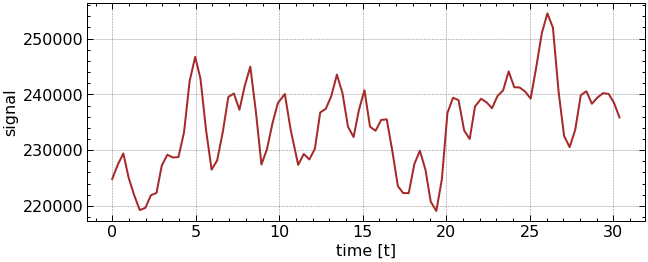

In [7]:
plt.figure(figsize=(10,4))
plt.plot(t1,x, '-', color='brown', lw=2, label='signl')
plt.xlabel('time [t]')
plt.ylabel('signal')

In [8]:
x= x-mean(x)
x=x/np.sqrt(mean(x**2))


Text(0, 0.5, 'signal')

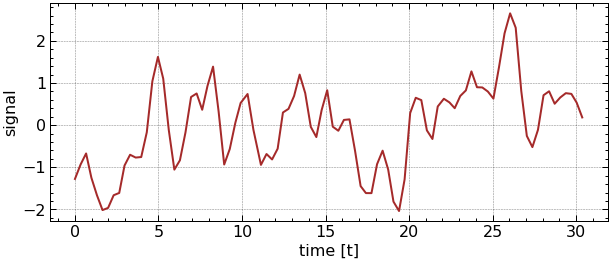

In [9]:
plt.figure(figsize=(10,4))
plt.plot(t1,x, '-', color='brown', lw=2, label='signl')
plt.xlabel('time [t]')
plt.ylabel('signal')


In [10]:
imf = emd.sift.sift(x)

Text(0, 0.5, 'signal')

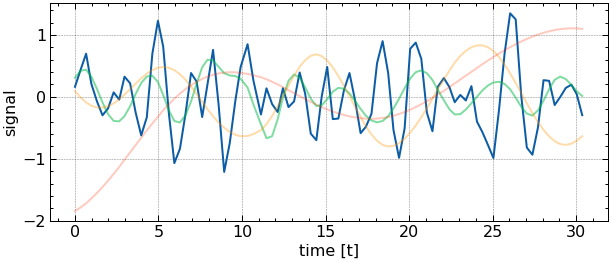

In [109]:
plt.figure(figsize=(10,4))
for i in range(len(imf[0,:])):
    plt.plot(t1,imf[:,i], '-', lw=2,alpha= 1/(i+1))
# plt.plot(t1,x, '-', color='green', lw=3, label='imf 1')

plt.xlabel('time [t]')
plt.ylabel('signal')


[]

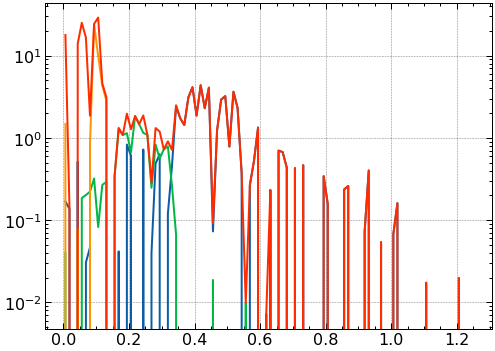

In [12]:
IP, IF, IA = emd.spectra.frequency_transform(imf, fs, 'hilbert')
freq_range = (0, 1.25, 100)
hht_f0, spec0 = emd.spectra.hilberthuang(IF[:,0], IA[:,0],freq_range)
hht_f1, spec1 = emd.spectra.hilberthuang(IF[:,1], IA[:,1],freq_range)
hht_f2, spec2 = emd.spectra.hilberthuang(IF[:,2], IA[:,2],freq_range)

hht_f, spec = emd.spectra.hilberthuang(IF, IA,freq_range)


plt.plot(hht_f0, spec0)
plt.plot(hht_f1, spec1)
plt.plot(hht_f2, spec2)
plt.plot(hht_f, spec)
plt.semilogy()

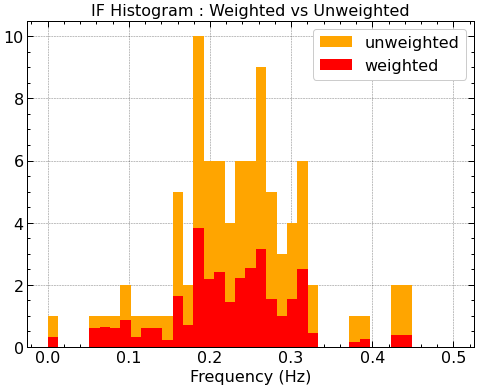

In [13]:
IP, IF, IA = emd.spectra.frequency_transform(imf, fs, 'nht')
plt.figure(figsize=(8, 6))

# Plot a simple histogram using frequency bins from 0-.5Hz
plt.hist(IF[:, 1], np.linspace(0, .5,40),color='orange',alpha= 1)
plt.hist(IF[:, 1], np.linspace(0, .5,40), weights=IA[:, 1],color='red',alpha=1)
plt.grid(True)
plt.title('IF Histogram : Weighted vs Unweighted')
plt.xlabel('Frequency (Hz)')
plt.legend(['unweighted','weighted'])


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/1479038518.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c=plt.pcolormesh(t1, hht_f, hht, cmap='seismic')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/1479038518.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


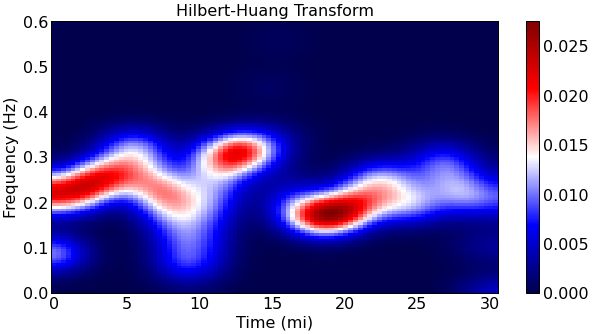

In [14]:
IP, IF, IA = emd.spectra.frequency_transform(imf, fs, 'hilbert')
freq_range = (0, .6, 100)
hht_f, hht = emd.spectra.hilberthuang(IF[:,1], IA[:,1], freq_range, mode='amplitude', sum_time=False)
hht = ndimage.gaussian_filter(hht, 5)
plt.figure(figsize=(10,5))

c=plt.pcolormesh(t1, hht_f, hht, cmap='seismic')
plt.title('Hilbert-Huang Transform')
plt.xlabel('Time (mi)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(c)

 Inputs samples (92) is small for specified max_imfs (9) very likely that 5 or fewer imfs are returned


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/2521340847.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c= plt.pcolormesh(t1, hht_f, hht, cmap='seismic')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/2521340847.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


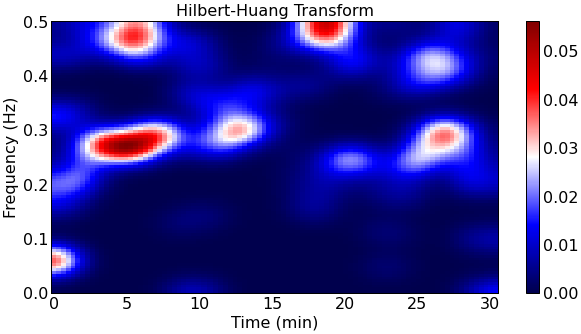

In [15]:
imfm = emd.sift.mask_sift(x)

IPm, IFm, IAm = emd.spectra.frequency_transform(imfm, fs, 'hilbert')
freq_range = (0, .5, 100)
hht_f, hht = emd.spectra.hilberthuang(IFm[:,:2], IAm[:,:2], freq_range, mode='amplitude', sum_time=False)
hht = ndimage.gaussian_filter(hht, 4)
plt.figure(figsize=(10,5))

c= plt.pcolormesh(t1, hht_f, hht, cmap='seismic')
plt.title('Hilbert-Huang Transform')
plt.xlabel('Time (min)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(c)

In [16]:
temp=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 
   'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
   'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
   'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
   'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
   'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 
   'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
   'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
   'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
   'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 
   'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r',
   'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 
   'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
   'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

In [17]:

def quality(c_i):
    a,b,c=0,0,0
    for n in range(len(t1)):
        a+= x[n]*c_i[n]
        b+= x[n]**2
        c+= c_i[n]**2

    gamma= a/(np.sqrt(b*c))
    return gamma

/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/2577296354.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/fxx,pxx)
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/2577296354.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/fxx,pxx)
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/2577296354.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/fxx,pxx)
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/2577296354.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/fxx,pxx)


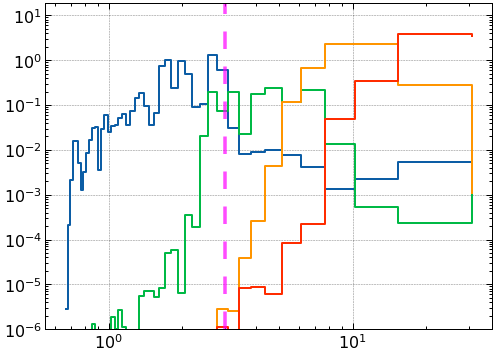

In [127]:
for i in range(4):
    
    fxx, pxx =sp.signal.welch(imfm[:,i],fs,nperseg=len(t1))
    plt.step(1/fxx,pxx)
plt.axvline(x=3.0,linestyle=(0,(5,5)),alpha=.7,c='fuchsia',linewidth=3.5)
plt.loglog()
plt.ylim(1e-6)
plt.show()

In [84]:
def fourier(sig,sr):
    X = np.fft.fft(sig)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    return freq[:N//2], np.abs(X)[:N//2]

/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/112671956.py:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/L[0], L[1], 'b')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/112671956.py:15: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/L[0], L[1], 'lightblue')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_32013/112671956.py:22: RuntimeWarning: divide by zero encountered in true_divide
  plt.step(1/fxx,pxx,'b')


[]

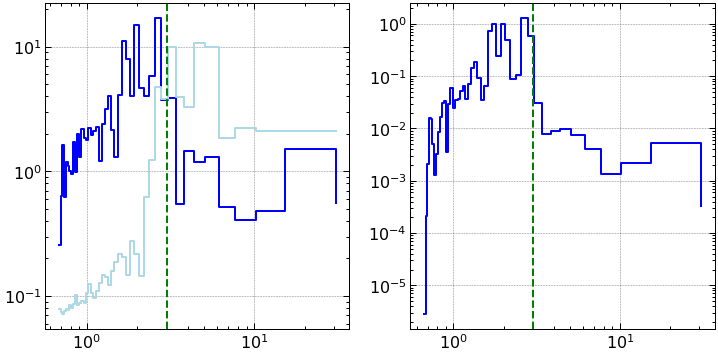

In [128]:
def fourier(sig,sr):
    X = np.fft.fft(sig)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    return freq[:N//2], np.abs(X)[:N//2]

plt.figure(figsize = (12, 6))

plt.subplot(121)
L= fourier(imfm[:,0],fs)
plt.step(1/L[0], L[1], 'b')
L= fourier(imfm[:,1],fs)
plt.step(1/L[0], L[1], 'lightblue')
plt.axvline(x=3,linestyle='--',color='green')
plt.loglog()


plt.subplot(122)
fxx, pxx =sp.signal.welch(imfm[:,0],fs,nperseg=len(t1))
plt.step(1/fxx,pxx,'b')
plt.axvline(x=3,linestyle='--',color='green')
plt.loglog()